<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span><ul class="toc-item"><li><span><a href="#Cluster-B-clonotypes" data-toc-modified-id="Cluster-B-clonotypes-4.1">Cluster B clonotypes</a></span></li></ul></li><li><span><a href="#Load-compiled-Ig-RData" data-toc-modified-id="Load-compiled-Ig-RData-5">Load compiled Ig RData</a></span><ul class="toc-item"><li><span><a href="#Gini-index-for-octamers" data-toc-modified-id="Gini-index-for-octamers-5.1">Gini index for octamers</a></span></li><li><span><a href="#Load-gini-rdata" data-toc-modified-id="Load-gini-rdata-5.2">Load gini rdata</a></span></li><li><span><a href="#Plot-gini-for-cohorts" data-toc-modified-id="Plot-gini-for-cohorts-5.3">Plot gini for cohorts</a></span></li><li><span><a href="#Plot-gini-for-immune-clusters" data-toc-modified-id="Plot-gini-for-immune-clusters-5.4">Plot gini for immune clusters</a></span></li><li><span><a href="#Representative-circle-plots-for-each-immune-cluster" data-toc-modified-id="Representative-circle-plots-for-each-immune-cluster-5.5">Representative circle plots for each immune cluster</a></span></li></ul></li><li><span><a href="#Deprecated" data-toc-modified-id="Deprecated-6">Deprecated</a></span><ul class="toc-item"><li><span><a href="#Survival-based-on-gini" data-toc-modified-id="Survival-based-on-gini-6.1">Survival based on gini</a></span></li><li><span><a href="#cytokine-expression-MHC-class-II-and-clonality" data-toc-modified-id="cytokine-expression-MHC-class-II-and-clonality-6.2">cytokine expression MHC class II and clonality</a></span></li><li><span><a href="#Deseq2-for-NBL" data-toc-modified-id="Deseq2-for-NBL-6.3">Deseq2 for NBL</a></span></li></ul></li><li><span><a href="#Table-S6" data-toc-modified-id="Table-S6-7">Table S6</a></span></li><li><span><a href="#Deprecated" data-toc-modified-id="Deprecated-8">Deprecated</a></span></li></ul></div>

# Dependencies

In [4]:
options(scipen = 999)

In [5]:
library(ggbeeswarm)
library(ggsignif)
library(igraph)
library(ggraph)
library(ggrepel)
library(ineq)

Loading required package: ggplot2


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




# Functions

In [6]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src/color_schemes.R")
source("~/OneDrive - UHN/R_src/Heatmap_functions.R")
source("~/OneDrive - UHN/R_src/Oncoprint_functions.R")
source("~/OneDrive - UHN/R_src/diversity_Splot_functions.R")
source("~/OneDrive - UHN/R_src/plotting_functions.R")

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.12
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



Attaching package: ‘circlize’


The following object is masked

# Paths

In [7]:
mountpath <- "/Users/anabbi/Desktop/Sam/immpedcan/IPD2_IGH_CLONES/"

In [8]:
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [9]:
load(paste0(datapath, "TME_clusters/IPD_estimate_metadata_IC.RData"))

## Cluster B clonotypes

See cavatica analysis IPD2 B cell cluster notebook for input to the plots

In [9]:
allfiles_clustered <- list.files(mountpath, pattern = "Clustered_CLONES", full.names = T, recursive = T)

In [10]:
head(allfiles_clustered)

[1] "/Users/anabbi/Desktop/Sam/immpedcan/IPD2_IGH_CLONES//Clustered_CLONES_IGH_7316-10_717108.txt"  
[2] "/Users/anabbi/Desktop/Sam/immpedcan/IPD2_IGH_CLONES//Clustered_CLONES_IGH_7316-100_601598.txt" 
[3] "/Users/anabbi/Desktop/Sam/immpedcan/IPD2_IGH_CLONES//Clustered_CLONES_IGH_7316-101_588338.txt" 
[4] "/Users/anabbi/Desktop/Sam/immpedcan/IPD2_IGH_CLONES//Clustered_CLONES_IGH_7316-1038_711661.txt"
[5] "/Users/anabbi/Desktop/Sam/immpedcan/IPD2_IGH_CLONES//Clustered_CLONES_IGH_7316-104_717154.txt" 
[6] "/Users/anabbi/Desktop/Sam/immpedcan/IPD2_IGH_CLONES//Clustered_CLONES_IGH_7316-1055_577725.txt"

In [11]:
all.files.clustered <- lapply(allfiles_clustered, 
                    function(f){read.table(f, header = TRUE, sep = "\t", stringsAsFactors = F)})

Add filenames as names

In [12]:
myfilesnames <- allfiles_clustered

In [13]:
names(all.files.clustered) <- gsub(".*Clustered_CLONES_IGH_", "", myfilesnames)
names(all.files.clustered) <- gsub(".txt", "", names(all.files.clustered))

bind all in a df

In [14]:
all.clustered <- do.call("rbind", all.files.clustered)

add filenmaes as a variable and remove rownmaes

In [15]:
all.clustered$filename <- rep(names(all.files.clustered), sapply(all.files.clustered, nrow))

In [16]:
rownames(all.clustered) <- NULL

In [17]:
all.clustered$sample_id <- gsub("_.*", "", all.clustered$filename)
all.clustered$aliquot <- gsub(".*_", "", all.clustered$filename)

In [18]:
head(all.clustered)

,cloneCount,cloneFraction,clonalSequence,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,allCHitsWithScore,allVAlignments,allDAlignments,allJAlignments,allCAlignments,nSeqCDR3,aaSeqCDR3,octamer,filename,sample_id,aliquot
,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,6,0.22222222,TGTGCGAAAGGGAGGGCGACTATGTTGGGCTCCTTTGCCTACTGG,"IGHV3-30*00(395.7),IGHV3-53*00(395.7),IGHV3-66*00(395.7),IGHV3-23*00(394.7),IGHV3-33*00(379.7)","IGHD3-10*00(30),IGHD3-22*00(30)",IGHJ4*00(143.3),IGHA1*00(352.3),342|349|373|0|7||35.0;339|346|370|0|7||35.0;339|346|370|0|7||35.0;342|352|373|0|10||50.0;342|349|373|0|7||35.0,36|42|93|18|24||30.0;36|42|93|18|24||30.0,24|37|68|32|45|SA29C|49.0,,TGTGCGAAAGGGAGGGCGACTATGTTGGGCTCCTTTGCCTACTGG,CAKGRATMLGSFAYW,AKGRATML,7316-10_717108,7316-10,717108
2,5,0.18518519,TGTGCGAGAGATGATGATACTAGTGGACATTACGGGTTATTTCACTACTGG,"IGHV3-33*00(287),IGHV3-30*00(272),IGHV3-48*00(271),IGHV3-66*00(256),IGHV3-7*00(255)",IGHD3-22*00(52),IGHJ4*00(183),IGHA2*00(240),342|354|373|0|12||60.0;342|354|373|0|12||60.0;342|354|373|0|12||60.0;339|351|370|0|12||60.0;342|354|373|0|12||60.0,39|59|93|13|33|SG45CST52AST53C|52.0,25|37|68|39|51|SG28C|44.0,,TGTGCGAGAGATGATGATACTAGTGGACATTACGGGTTATTTCACTACTGG,CARDDDTSGHYGLFHYW,ARDDDTSG,7316-10_717108,7316-10,717108
3,4,0.14814815,TGTGCGCGAGACGCAGCCATTGAGTACTTCGAGTACTGG,IGHV3-60*00(92),"IGHD5-24*00(30),IGHD6-19*00(30)",IGHJ1*00(170),IGHA1*00(315),343|347|374|0|4||20.0,8|14|60|14|20||30.0;4|10|63|13|19||30.0,22|41|72|20|39|SA25GSC32GSC35T|47.0,,TGTGCGCGAGACGCAGCCATTGAGTACTTCGAGTACTGG,CARDAAIEYFEYW,ARDAAIEY,7316-10_717108,7316-10,717108
4,3,0.11111111,TGTGCGAGTCTGGATACAGCTATAAGTCCTGTCAATGCCTACTGG,IGHV3-7*00(678),"IGHD5-18*00(65),IGHD5-5*00(65)","IGHJ4*00(190),IGHJ5*00(175)","IGHG1*00(104),IGHG2*00(104),IGHGP*00(104)",342|350|373|0|8||40.0,21|34|60|10|23||65.0;21|34|60|10|23||65.0,30|37|68|38|45||35.0;36|40|71|41|45||20.0,;;,TGTGCGAGTCTGGATACAGCTATAAGTCCTGTCAATGCCTACTGG,CASLDTAISPVNAYW,ASLDTAIS,7316-10_717108,7316-10,717108
5,3,0.11111111,TGTGCGAGAGACTGGGGGAGTGGTTATTTGGTCCATGACTACTGG,"IGHV1-18*00(138),IGHV1-2*00(138),IGHV3-11*00(138),IGHV3-53*00(138),IGHV4-4*00(122)",IGHD3-3*00(60),IGHJ4*00(205),"IGHG1*00(154),IGHG2*00(154),IGHGP*00(138)",342|353|373|0|11||55.0;342|353|373|0|11||55.0;342|353|373|0|11||55.0;339|350|370|0|11||55.0;339|350|370|0|11||55.0,45|57|93|16|28||60.0,27|37|68|35|45||50.0,;;,TGTGCGAGAGACTGGGGGAGTGGTTATTTGGTCCATGACTACTGG,CARDWGSGYLVHDYW,ARDWGSGY,7316-10_717108,7316-10,717108
6,1,0.03703704,TGTGCGAGACACCCCCCTGTCCGGGGAATTTTCGCTGCAGAATATTACTACTACATGGACGTCTGG,"IGHV3-23*00(99),IGHV4-31*00(93),IGHV4-4*00(93),IGHV4-59*00(93),IGHV4-61*00(93)","IGHD3-10*00(30),IGHD6-25*00(30),IGHD6-6*00(30)",IGHJ6*00(196),,342|349|373|0|7||35.0;345|354|376|0|9||45.0;339|348|370|0|9||45.0;339|348|370|0|9||45.0;345|354|376|0|9||45.0,45|51|93|21|27||30.0;5|11|54|32|38||30.0;32|38|54|18|24||30.0,31|52|83|45|66||105.0,,TGTGCGAGACACCCCCCTGTCCGGGGAATTTTCGCTGCAGAATATTACTACTACATGGACGTCTGG,CARHPPVRGIFAAEYYYYMDVW,ARHPPVRG,7316-10_717108,7316-10,717108


subset to samples in metadata

In [19]:
all_clustered_ipd <- merge(all.clustered, metadata_IC[,c("sample_id", "aliquot_id", "cohort")], by = "sample_id")

In [20]:
dim(all_clustered_ipd)

[1] 194258     19

In [22]:
save(all_clustered_ipd, file = paste0(datapath, "Diversity/all_clustered_ipd_ig.RData"))

# Load compiled Ig RData

In [8]:
load(file = paste0(datapath, "Diversity/all_clustered_ipd_ig.RData"))

remove singlet and dublet cdr3 due to SHM

In [9]:
all_clustered_ipd_12rm <- all_clustered_ipd[all_clustered_ipd$cloneCount > 2,]

In [10]:
cdr3_count <- as.data.frame(table(all_clustered_ipd_12rm$sample_id), stringsAsFactors = F)

In [11]:
head(cdr3_count)

,Var1,Freq
,<chr>,<int>
1,7316-10,5
2,7316-100,41
3,7316-1060,2
4,7316-1064,10
5,7316-1075,106
6,7316-1078,4


In [12]:
dim(cdr3_count)

[1] 473   2

count octamers for each sample

In [13]:
for(i in 1:nrow(cdr3_count)){
    tmp <- all_clustered_ipd_12rm[all_clustered_ipd_12rm$sample_id == cdr3_count$Var1[i],]
    octamerfreq <- as.data.frame(table(tmp$octamer))
    octamercount <- nrow(octamerfreq)
    cdr3_count$octamer[i] <- octamercount
    
}

In [14]:
head(cdr3_count)

,Var1,Freq,octamer
,<chr>,<int>,<int>
1,7316-10,5,5
2,7316-100,41,41
3,7316-1060,2,2
4,7316-1064,10,10
5,7316-1075,106,103
6,7316-1078,4,4


count number of clusters with more than 3 cdr3 ssequnece

In [15]:
cdr3_count$cluster <- NA
for(i in 1:nrow(cdr3_count)){
    tmp <- all_clustered_ipd_12rm[all_clustered_ipd_12rm$sample_id == cdr3_count$Var1[i],]
    if(nrow(tmp) < 2){next()}
    octamerfreq <- as.data.frame(table(tmp$octamer))
    clustercount <- nrow(octamerfreq[octamerfreq$Freq >= 3,])
    cdr3_count$cluster[i] <- clustercount
    
}

In [16]:
dim(cdr3_count)

[1] 473   4

In [17]:
summary(cdr3_count$cluster)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   2.977   1.000 189.000      75 

remove samples with < 2 sequences

In [18]:
cdr3_count <- cdr3_count[cdr3_count$Freq > 2,]

In [19]:
summary(cdr3_count$cluster)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   3.283   1.000 189.000 

In [20]:
head(cdr3_count)

,Var1,Freq,octamer,cluster
,<chr>,<int>,<int>,<int>
1,7316-10,5,5,0
2,7316-100,41,41,0
4,7316-1064,10,10,0
5,7316-1075,106,103,0
6,7316-1078,4,4,0
7,7316-1081,64,47,3


In [21]:
dim(cdr3_count)

[1] 361   4

In [22]:
colnames(cdr3_count) <- c("sample_id", "cdr3", "octamer", "cluster")

keep only those octamers that have more than 2 cdr3s

In [23]:
all_clustered_ipd_12rm_clusters <- all_clustered_ipd_12rm[0,]
for(i in 1:nrow(cdr3_count)){
    mysample <- cdr3_count$sample_id[i]
    message(mysample)
    tmp <- all_clustered_ipd_12rm[all_clustered_ipd_12rm$sample_id == mysample,]
    table_octamer <- as.data.frame(table(tmp$octamer), stringsAsFactors = F)
#remove octamers with less than 3 cdr3
    table_octamer_rm <- table_octamer[table_octamer$Freq < 3,]
    tmp_clusters <- tmp[!tmp$octamer %in% table_octamer_rm$Var1,]
    all_clustered_ipd_12rm_clusters <- rbind(all_clustered_ipd_12rm_clusters, tmp_clusters)
    
}

7316-10

7316-100

7316-1064

7316-1075

7316-1078

7316-1081

7316-1082

7316-1084

7316-1087

7316-1090

7316-1093

7316-1094

7316-1107

7316-1108

7316-1134

7316-1137

7316-116

7316-119

7316-122

7316-1226

7316-127

7316-133

7316-134

7316-136

7316-1455

7316-146

7316-147

7316-161

7316-1635

7316-1643

7316-1648

7316-1652

7316-1653

7316-1659

7316-166

7316-1664

7316-1671

7316-1678

7316-168

7316-1681

7316-1683

7316-1710

7316-1711

7316-173

7316-1744

7316-1748

7316-175

7316-1763

7316-1771

7316-1773

7316-1775

7316-1776

7316-1779

7316-178

7316-1786

7316-1793

7316-1802

7316-1803

7316-184

7316-1854

7316-186

7316-1866

7316-1886

7316-1926

7316-1937

7316-1942

7316-1944

7316-1949

7316-195

7316-1950

7316-1953

7316-1954

7316-1957

7316-196

7316-1965

7316-1972

7316-1975

7316-1977

7316-1978

7316-198

7316-1986

7316-206

7316-207

7316-2071

7316-2075

7316-2084

7316-2125

7316-2130

7316-2133

7316-2135

7316-2141

7316-2157

7316-216

731

In [24]:
dim(all_clustered_ipd_12rm)

[1] 51798    19

In [25]:
dim(all_clustered_ipd_12rm_clusters)

[1] 6696   19

In [26]:
length(unique(all_clustered_ipd_12rm_clusters$sample_id))

[1] 182

remove unknown octamers

In [27]:
all_clustered_ipd_12rm_clusters <- all_clustered_ipd_12rm_clusters[!is.na(all_clustered_ipd_12rm_clusters$octamer),]

In [28]:
dim(all_clustered_ipd_12rm_clusters)

[1] 5801   19

In [29]:
length(unique(all_clustered_ipd_12rm_clusters$sample_id))

[1] 105

In [30]:
head(all_clustered_ipd_12rm_clusters)

,sample_id,cloneCount,cloneFraction,clonalSequence,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,allCHitsWithScore,allVAlignments,allDAlignments,allJAlignments,allCAlignments,nSeqCDR3,aaSeqCDR3,octamer,filename,aliquot,aliquot_id,cohort
,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1020,7316-1081,7,0.013282732,TGTGCGAGAGAATCTCGAACCGCCAATGGGAACCCATGGTTCGGGGACTTAATCTCCTTTGACTATTGG,IGHV4-31*00(396.7),IGHD3-10*00(64),IGHJ4*00(198.3),"IGHG1*00(193.3),IGHG3*00(175)",345|356|376|0|11||55.0,39|55|93|35|51|SG51C|64.0,24|37|68|56|69|SC33T|49.0,;,TGTGCGAGAGAATCTCGAACCGCCAATGGGAACCCATGGTTCGGGGACTTAATCTCCTTTGACTATTGG,CARESRTANGNPWFGDLISFDYW,ARESRTPN,7316-1081_731897,731897,731897,pedLGG
1021,7316-1081,4,0.007590133,TGTGCGAGAGTTTCGCGAGCGGCTGGGACCAGAAGAAAATTAATATTCTTTGACTACTGG,"IGHV4-31*00(276.5),IGHV4-4*00(268.5)","IGHD6-25*00(35),IGHD6-19*00(30)",IGHJ4*00(126.5),IGHG1*00(143.5),345|355|376|0|10||50.0;339|349|370|0|10||50.0,27|34|54|17|24||35.0;33|39|63|20|26||30.0,24|37|68|47|60||65.0,,TGTGCGAGAGTTTCGCGAGCGGCTGGGACCAGAAGAAAATTAATATTCTTTGACTACTGG,CARVSRAAGTRRKLIFFDYW,ARVSREAG,7316-1081_731897,731897,731897,pedLGG
1026,7316-1081,20,0.037950664,TGTGCGAGACTTCGAAGGGGCACCAACAACTGGTACCAGGCCTACTACCAATACAACGCTATGGACGTCTGG,IGHV4-39*00(289.6),"IGHD2-15*00(43),IGHD1-1*00(40)",IGHJ6*00(121.2),IGHG1*00(105.6),345|355|376|0|10||50.0,10|25|93|41|56|SC14TSC19A|43.0;20|28|51|25|33||40.0,40|52|83|60|72||60.0,,TGTGCGAGACTTCGAAGGGGCACCAACAACTGGTACCAGGCCTACTACCAATACAACGCTATGGACGTCTGG,CARLRRGTNNWYQAYYQYNAMDVW,ARLRRGTN,7316-1081_731897,731897,731897,pedLGG
1027,7316-1081,3,0.005692600,TGTGCGAGAGAATCTCGAACCCCCAATGGGAACCCATGGTTCGGGGACTTATCCTCCTTTGACTACTGG,"IGHV4-31*00(189),IGHV4-4*00(189)",IGHD3-10*00(69),IGHJ4*00(204),IGHG1*00(108),345|356|376|0|11||55.0;339|350|370|0|11||55.0,39|56|93|35|52|SG51C|69.0,24|37|68|56|69||65.0,,TGTGCGAGAGAATCTCGAACCCCCAATGGGAACCCATGGTTCGGGGACTTATCCTCCTTTGACTACTGG,CARESRTPNGNPWFGDLSSFDYW,ARESRTPN,7316-1081_731897,731897,731897,pedLGG
1028,7316-1081,7,0.013282732,TGTGCGAGACTTCGAAGGGGCACCAATAGCTGGTATCAGGCCTACTACTACTACAACGCTATGGACGTCTGG,IGHV4-39*00(309.7),"IGHD2-2*00(40),IGHD6-13*00(40),IGHD5-18*00(35)",IGHJ6*00(197),IGHG1*00(88.3),345|355|376|0|10||50.0,8|16|93|27|35||40.0;33|41|63|27|35||40.0;6|13|60|25|32||35.0,22|52|83|42|72|ST34AST37GSA38CSC39T|86.0,,TGTGCGAGACTTCGAAGGGGCACCAATAGCTGGTATCAGGCCTACTACTACTACAACGCTATGGACGTCTGG,CARLRRGTNSWYQAYYYYNAMDVW,ARLRRGTN,7316-1081_731897,731897,731897,pedLGG
1032,7316-1081,5,0.009487666,TGTACGAGAGAATCTCGAACCCCCAATGGGAACCCATGGTTCGGGGACTTATCCTCCTTTGACTACTGG,"IGHV4-4*00(229.8),IGHV4-59*00(220.2),IGHV4-61*00(220.2),IGHV4-31*00(219.6)",IGHD3-10*00(69),IGHJ4*00(197.6),IGHG1*00(190.6),339|350|370|0|11|SG342A|39.0;339|350|370|0|11|SG342A|39.0;345|356|376|0|11|SG348A|39.0;345|356|376|0|11|SG348A|39.0,39|56|93|35|52|SG51C|69.0,24|37|68|56|69||65.0,,TGTACGAGAGAATCTCGAACCCCCAATGGGAACCCATGGTTCGGGGACTTATCCTCCTTTGACTACTGG,CTRESRTPNGNPWFGDLSSFDYW,ARESRTPN,7316-1081_731897,731897,731897,pedLGG


## Gini index for octamers

To calculate gini, start with list of cdr3s that have more than 2 reads, group reads based on cluster, if exists, then measure gini

In [32]:
summary(cdr3_count$cluster)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   3.283   1.000 189.000 

In [33]:
head(cdr3_count)

,sample_id,cdr3,octamer,cluster
,<chr>,<int>,<int>,<int>
1,7316-10,5,5,0
2,7316-100,41,41,0
4,7316-1064,10,10,0
5,7316-1075,106,103,0
6,7316-1078,4,4,0
7,7316-1081,64,47,3


In [34]:
sample_tab <- as.data.frame(table(all_clustered_ipd_12rm$sample_id), stringsAsFactors = F)

In [35]:
colnames(sample_tab) <- c("sample_id", "unique_cdr3")

In [36]:
dim(sample_tab)

[1] 473   2

In [37]:
sample_tab$gini <- NA
sample_tab$octamers <- NA
for(i in 1:nrow(sample_tab)){
    s <- sample_tab$sample_id[i]
    message(s)
    mysample <- all_clustered_ipd_12rm[all_clustered_ipd_12rm$sample_id == s,]
# if octamer is NA, replace it with cdr3 to count it as one cdr3
    all_clustered_ipd_12rm$octamer[is.na(all_clustered_ipd_12rm$octamer)] <- all_clustered_ipd_12rm$aaSeqCDR3[is.na(all_clustered_ipd_12rm$octamer)] 
    octamer_tab <- as.data.frame(table(mysample$octamer), stringsAsFactors = F)

    octamer_tab$octamerreads <- NA
    for(j in 1:nrow(octamer_tab)){
        myoctamer <- octamer_tab$Var1[j]
        octamerreads <- sum(mysample$cloneCount[which(mysample$octamer == myoctamer)])
        octamer_tab$octamerreads[j] <- octamerreads
    }
    sample_tab$octamers[i] <- length(octamer_tab$Freq)
    sample_tab$gini[i] <- ineq(octamer_tab$octamerreads,type="Gini")
}

7316-10

7316-100

7316-1060

7316-1064

7316-1075

7316-1078

7316-1081

7316-1082

7316-1084

7316-1087

7316-1090

7316-1093

7316-1094

7316-1103

7316-1104

7316-1107

7316-1108

7316-1114

7316-1134

7316-1137

7316-116

7316-119

7316-120

7316-121

7316-1214

7316-122

7316-1226

7316-124

7316-127

7316-133

7316-134

7316-136

7316-1455

7316-146

7316-147

7316-160

7316-161

7316-1635

7316-1637

7316-1643

7316-1648

7316-1652

7316-1653

7316-1654

7316-1659

7316-166

7316-1660

7316-1664

7316-1669

7316-1671

7316-1678

7316-168

7316-1681

7316-1683

7316-1693

7316-1702

7316-1710

7316-1711

7316-173

7316-1744

7316-1748

7316-175

7316-1763

7316-1767

7316-1771

7316-1773

7316-1775

7316-1776

7316-1779

7316-178

7316-1786

7316-1793

7316-1794

7316-1801

7316-1802

7316-1803

7316-183

7316-184

7316-1844

7316-1845

7316-1854

7316-186

7316-1866

7316-1886

7316-1926

7316-193

7316-1937

7316-1942

7316-1944

7316-1949

7316-195

7316-1950

7316-1952

7316

In [38]:
head(sample_tab)

,sample_id,unique_cdr3,gini,octamers
,<chr>,<int>,<dbl>,<int>
1,7316-10,5,0.15238095,5
2,7316-100,41,0.22261151,41
3,7316-1060,2,0.07142857,2
4,7316-1064,10,0.20666667,10
5,7316-1075,106,0.80550611,106
6,7316-1078,4,0.05769231,4


remove samples with less than 3 cdr3s because their gini index is not accurate

In [39]:
sample_tab <- sample_tab[sample_tab$unique_cdr3 > 2,]

In [40]:
dim(sample_tab)

[1] 361   4

In [41]:
summary(sample_tab$gini)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1905  0.2943  0.3439  0.4746  0.9264 

In [42]:
clusteredsamples_gini <- metadata_IC[metadata_IC$sample_id %in% sample_tab$sample_id,]

In [43]:
dim(clusteredsamples_gini)

[1] 361  24

In [44]:
head(sample_tab)

,sample_id,unique_cdr3,gini,octamers
,<chr>,<int>,<dbl>,<int>
1,7316-10,5,0.15238095,5
2,7316-100,41,0.22261151,41
4,7316-1064,10,0.20666667,10
5,7316-1075,106,0.80550611,106
6,7316-1078,4,0.05769231,4
7,7316-1081,64,0.45312877,47


In [45]:
clusteredsamples_gini_m <- merge(clusteredsamples_gini, sample_tab, by = "sample_id")

In [46]:
dim(clusteredsamples_gini_m)

[1] 361  27

In [47]:
save(clusteredsamples_gini_m, file = paste0(datapath, "Diversity/clusteredsamples_gini.RData"))

## Load gini rdata

In [10]:
load(file = paste0(datapath, "Diversity/clusteredsamples_gini.RData"))

## Plot gini for cohorts

In [11]:
df.cohorts <- cbind.data.frame(unique(clusteredsamples_gini_m$cohort), NA, stringsAsFactors = F)
colnames(df.cohorts) <- c("cohort", "median") 
for(i in 1:nrow(df.cohorts)){
    df.cohorts$median[i]<-median(clusteredsamples_gini_m$gini[clusteredsamples_gini_m$cohort == df.cohorts$cohort[i]])
} 
df.cohorts <- df.cohorts[order(df.cohorts$median),]

In [12]:
disease.width <- (nrow(clusteredsamples_gini_m)/nrow(df.cohorts)) 
sorted.df <- clusteredsamples_gini_m[0,]
start = 0
for(i in 1:(nrow(df.cohorts))){
    tmp <- clusteredsamples_gini_m[clusteredsamples_gini_m$cohort == df.cohorts$cohort[i],]
    tmp <- tmp[order(tmp$gini),]
#create range of x values to squeeze dots into equal widths of the plot for each Disease regardless of the number of samples
    div <- disease.width/nrow(tmp)
    #If there is only one sample, put the dot in the middle of the alloted space
if(dim(tmp)[1]==1){
    tmp$Xpos<-start+(disease.width/2)
} 
    else tmp$Xpos <- seq(from = start, to = start+disease.width, by = div)[-1]
    sorted.df <- rbind(sorted.df, tmp)  
    df.cohorts$Median.start[i] <- tmp$Xpos[1]
    df.cohorts$Median.stop[i] <- tmp$Xpos[nrow(tmp)]
    df.cohorts$N[i]<-nrow(tmp)
    start <- start+disease.width+30
}
    df.cohorts$medianloc <- df.cohorts$Median.start+((df.cohorts$Median.stop-df.cohorts$Median.start)/2)
    sorted.df$cohort <- factor(sorted.df$cohort,levels = df.cohorts$cohort)

In [13]:
disease.width <- (nrow(sorted.df)/nrow(df.cohorts)) 
Splot <- ggplot() +
geom_point(data = sorted.df, aes(x = Xpos ,y = gini,color = cohort), size = 5) +
geom_crossbar(data = df.cohorts, aes(x =medianloc, y = median,ymin = median, ymax = median),width = disease.width) +
theme(axis.title.x = element_blank(),
      axis.text.x = element_text(angle = 45, hjust = 1),
      axis.line = element_line(color = "black"),
      axis.text = element_text(size = 22),
      axis.title = element_text(size = 22)) +
myplot + theme(legend.position = "none") +
scale_color_manual(values = cohort_col) +
scale_x_continuous(breaks = seq((disease.width)/2,max(sorted.df$Xpos),disease.width+30),labels = df.cohorts$cohort) + 
scale_y_continuous(breaks = seq(0,1, 0.25), limits = c(0,1)) +
labs(y = "gini index") 

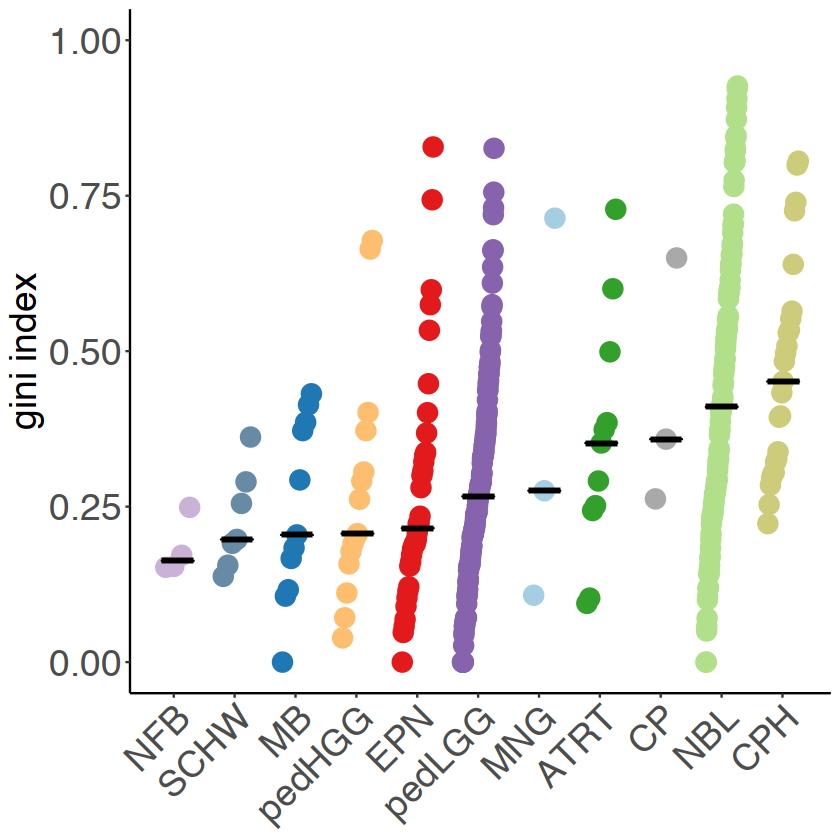

In [14]:
Splot

In [15]:
pdf(file = paste0(plotpath,"gini_Splot_cohort.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE)
Splot
dev.off()

pdf 
  2

## Plot gini for immune clusters

In [16]:
tapply(clusteredsamples_gini_m$gini, clusteredsamples_gini_m$immune_cluster,summary)

$`Pediatric inflamed`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.04825 0.28984 0.39376 0.41942 0.54781 0.84642 

$`Myeloid-driven`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1913  0.2848  0.3412  0.4685  0.9264 

$`Pediatric cold`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1538  0.2570  0.2983  0.4089  0.8434 

$`Immune excluded`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.04762 0.16667 0.25564 0.31695 0.41466 0.87262 


In [17]:
dim(clusteredsamples_gini_m)

[1] 361  27

In [18]:
table(clusteredsamples_gini_m$cohort)


  ATRT     CP    CPH    EPN     MB    MNG    NBL    NFB pedHGG pedLGG   SCHW 
    11      3     25     34     11      3    113      4     15    135      7 

Warning message in wilcox.test.default(c(0.236482471776589, 0.614145658263305, 0.701803482587065, :
“cannot compute exact p-value with ties”


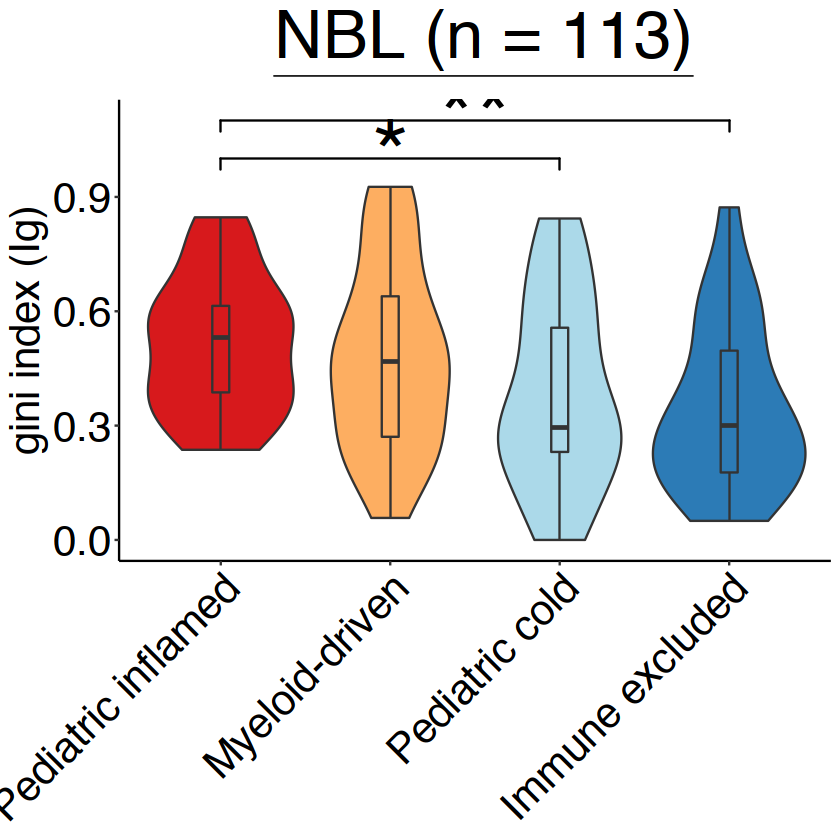

In [20]:
giniplot_nbl <- ggplot(data = clusteredsamples_gini_m[ clusteredsamples_gini_m$cohort == "NBL",],
                  aes(x = immune_cluster, y = gini, fill = immune_cluster)) + 
geom_violin() + geom_boxplot(width = 0.1, outlier.colour = NA) + myaxis + myplot +
scale_fill_manual(values = cluster_col) + 
theme(legend.position = "none", axis.title.x = element_blank(),
      plot.title = element_text(hjust = 0.5, size = 40)) + labs(y = "gini index (Ig)") +
#geom_signif(comparisons = list(c("Pediatric inflamed", "Myeloid-driven")), y_position = 0.9,
#                     map_signif_level=TRUE, textsize = 20, test = "wilcox.test", vjust = 0.5) +
geom_signif(comparisons = list(c("Pediatric inflamed", "Pediatric cold")), y_position = 1,
                     map_signif_level=TRUE, textsize = 20, test = "wilcox.test", vjust = 0.5) +
geom_signif(comparisons = list(c("Pediatric inflamed", "Immune excluded")), y_position = 1.1,
                     map_signif_level=TRUE, textsize = 20, test = "wilcox.test", vjust = 0.5)

giniplot_nbl + ggtitle(~underline("NBL (n = 113)"))

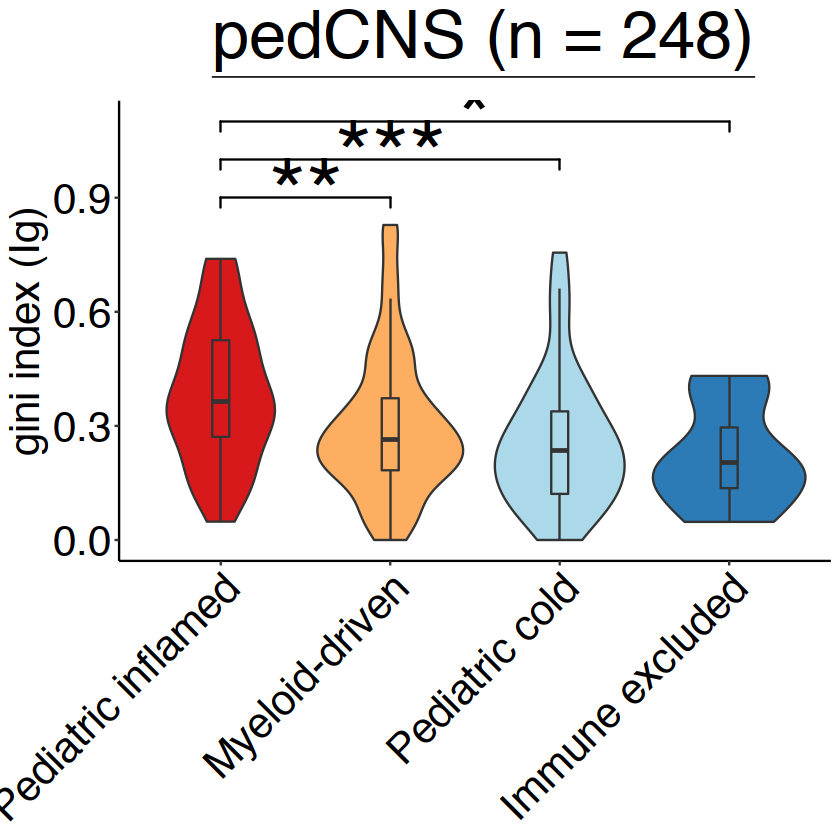

In [21]:
giniplot_cns <- ggplot(data = clusteredsamples_gini_m[ clusteredsamples_gini_m$cohort != "NBL",],
                  aes(x = immune_cluster, y = gini, fill = immune_cluster)) + 
geom_violin() + geom_boxplot(width = 0.1, outlier.colour = NA) + myaxis + myplot +
scale_fill_manual(values = cluster_col) + 
theme(legend.position = "none", axis.title.x = element_blank(),
      plot.title = element_text(hjust = 0.5, size = 40)) + labs(y = "gini index (Ig)") +
geom_signif(comparisons = list(c("Pediatric inflamed", "Myeloid-driven")), y_position = 0.9,
                     map_signif_level=TRUE, textsize = 20, test = "wilcox.test", vjust = 0.5) +
geom_signif(comparisons = list(c("Pediatric inflamed", "Pediatric cold")), y_position = 1,
                     map_signif_level=TRUE, textsize = 20, test = "wilcox.test", vjust = 0.5) +
geom_signif(comparisons = list(c("Pediatric inflamed", "Immune excluded")), y_position = 1.1,
                     map_signif_level=TRUE, textsize = 20, test = "wilcox.test", vjust = 0.5)

giniplot_cns + ggtitle(~underline("pedCNS (n = 248)"))

In [24]:
pdf(file = paste0(plotpath,"Immune_clusters_gini_CNS.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE)

giniplot_cns + ggtitle(~underline("pedCNS (n = 248)"))

dev.off()

pdf 
  2

In [25]:
pdf(file = paste0(plotpath,"Immune_clusters_gini_NBL.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE)
giniplot_nbl + ggtitle(~underline("NBL (n = 113)"))
dev.off()

Warning message in wilcox.test.default(c(0.236482471776589, 0.614145658263305, 0.701803482587065, :
“cannot compute exact p-value with ties”


pdf 
  2

## Representative circle plots for each immune cluster

In [75]:
tapply(clusteredsamples_gini_m$unique_cdr3, clusteredsamples_gini_m$immune_cluster,summary)

$`Pediatric inflamed`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3      30     157     422     533    5053 

$`Myeloid-driven`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.0    10.0    28.0    93.8    73.0  1650.0 

$`Pediatric cold`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00    5.00   10.00   51.06   38.00  795.00 

$`Immune excluded`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00    5.00   10.00   19.45   28.00   78.00 


In [76]:
tmp <- clusteredsamples_gini_m[ clusteredsamples_gini_m$unique_cdr3 < 35 &
                              clusteredsamples_gini_m$unique_cdr3 > 25,]

In [78]:
head(tmp)

,sample_id,aliquot_id,StromalScore,ImmuneScore,ESTIMATEScore,name,case_id,gender,ethnicity,race,⋯,group,cohort,sample_type,age_class,tumour_subtype,CRI_cluster,immune_cluster,unique_cdr3,gini,octamers
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<int>,<dbl>,<int>
10,7316-1090,717127,-406.0417,407.70919,1.667443,b75638c2-fdc0-4321-8320-b7b3b7b6940e.rsem.genes.results,C333822,Male,Reported Unknown,Other,⋯,CBTN,pedLGG,Initial CNS Tumor,Children,BRAF_KIAA1549,Lymphocyte depleted,Myeloid-driven,30,0.2848101,30
11,7316-1093,654179,-331.9222,-26.03728,-357.959472,59f3d156-d786-481c-b3a4-a69f653041db.rsem.genes.results,C364818,Male,Reported Unknown,Other,⋯,CBTN,pedLGG,Initial CNS Tumor,Children,BRAF_WT,Inflammatory,Pediatric cold,27,0.4215821,27
28,7316-161,406959,-117.0687,400.29066,283.221935,b45063a8-4b10-4c58-9225-f57bdef45503.rsem.genes.results,C34809,Male,Hispanic or Latino,Other,⋯,CBTN,pedHGG,Initial CNS Tumor,NA,HGG_WT,Lymphocyte depleted,Myeloid-driven,26,0.1783217,26
34,7316-1659,731889,-261.9203,1515.62946,1253.709189,a2957322-a70e-4e7d-a81f-84b8d26cc166.rsem.genes.results,C824100,Female,Reported Unknown,Other,⋯,CBTN,pedLGG,Initial CNS Tumor,Children,BRAF_p.V600E,Inflammatory,Pediatric inflamed,28,0.2860471,27
38,7316-1678,711654,436.0408,679.46576,1115.506589,87a37598-c672-4ae1-915b-8666772466cc.rsem.genes.results,C824592,Female,Reported Unknown,Other,⋯,CBTN,pedLGG,Initial CNS Tumor,Infants,BRAF_p.V600E,Inflammatory,Myeloid-driven,32,0.2570153,32
51,7316-1775,571427,-1011.6871,34.03997,-977.647148,cf2e69a6-c9b8-47d3-92a6-52c41f4cbc2a.rsem.genes.results,C387450,Male,Not Hispanic or Latino,White,⋯,CBTN,CPH,Initial CNS Tumor,Adolescents,NA,Inflammatory,Myeloid-driven,31,0.3032634,30


In [77]:
table(tmp$immune_cluster)


Pediatric inflamed     Myeloid-driven     Pediatric cold    Immune excluded 
                 5                 12                  6                  2 

In [79]:
for(s in tmp$sample_id){
   circlepack.reads.fx(all_clustered_ipd_12rm, s)}

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored

Non-leaf weights ignored



# Deprecated

## Survival based on gini

In [82]:
summary(clusteredsamples_gini_m$gini)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1905  0.2943  0.3439  0.4746  0.9264 

In [25]:
highgini<- clusteredsamples_gini_m$sample_id[ clusteredsamples_gini_m$gini > 0.2951]

lowgini <- clusteredsamples_gini_m$sample_id[ clusteredsamples_gini_m$gini <= 0.2951]

In [26]:
gini_df_all <- primary_estimate_manifest_quanti[primary_estimate_manifest_quanti$sample_id %in% 
                                           clusteredsamples_gini_m$sample_id,]

In [27]:
table(gini_df_all$vital_status)


                Alive              Deceased Deceased-due to other 
                  265                    58                     1 
     Reported Unknown 
                   10 

In [28]:
gini_df_all$vital_status[gini_df_all$vital_status == "Deceased"] <- 1
gini_df_all$vital_status[gini_df_all$vital_status == "Alive"] <- 0
gini_df_all$vital_status <- as.numeric(as.character(gini_df_all$vital_status))

gini_df_all <- gini_df_all[!is.na(gini_df_all$vital_status),]

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [29]:
gini_df_all$class <- NA
gini_df_all$class[ gini_df_all$sample_id %in% highgini  ] <- 1
gini_df_all$class[ gini_df_all$sample_id %in% lowgini ] <- 0

In [30]:
gini_df <- gini_df_all[gini_df_all$cohort == "NBL",]

In [31]:
sfit <- survfit(Surv(days_to_death, vital_status) ~ class, data= gini_df)

In [32]:
kmplot <- ggsurvplot(sfit, pval = TRUE, pval.size = 8,
           legend.title="using ped median 0.29", font.legend = 16, 
          font.main = 23, 
          font.x = 25,
          font.y = 25,
          font.tickslab = 20)

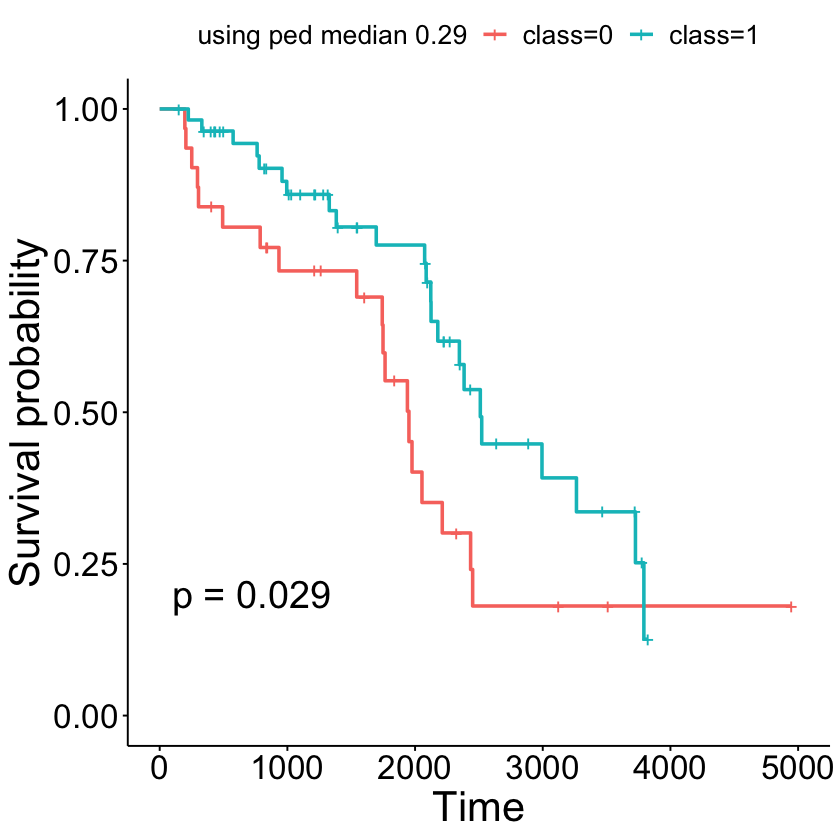

In [33]:
kmplot

In [371]:
pdf(file = paste0(plotpath,"nbl_KM_gini.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE,
    onefile = FALSE)
kmplot
dev.off()

pdf 
  2

## cytokine expression MHC class II and clonality

In [147]:
geneset_hm <- function(gene_mat, cohort_vector, estimate_manifest, geneset){
    subst_exp <- gene_mat[which(rownames(gene_mat) %in% geneset),]
   
    ## To order exp data based on geneset
    subst_exp <- subst_exp[geneset,]
    subst_exp <- log2(subst_exp + 1)   

    subst_exp_cases <- subst_exp[, colnames(subst_exp) %in% names(cohort_vector)]
    # This is to match the order in matrix to the cohorts
    subst_exp_cases <- subst_exp_cases[,names(cohort_vector)]
    subst_exp_cases <- as.matrix(subst_exp_cases)
    gene_hm = Heatmap(t(subst_exp_cases),
                         #titles and names   
                      name = "Gene expression (log2)",   
                      show_row_names = FALSE,
                      show_column_names = TRUE,     
                      #clusters and orders  
                      cluster_columns = FALSE,
                      cluster_rows = TRUE,
                 #     row_order = estimate_manifest$sample_id,

                      show_column_dend = FALSE,
                      row_dend_width = unit(8, "cm"),
                      column_order = geneset, 
                      #aesthestics
                      # col = col_fun_genes,
                      column_names_gp = gpar(fontsize = 28),
                      row_names_gp = gpar(fontsize = 2),
                      width = unit(length(geneset), "cm"),
                      column_title_gp = gpar(fontsize = 42),
                      column_title = NULL,
                      row_title = NULL
)

    return(gene_hm)
}

In [36]:
library(circlize)
library(ComplexHeatmap)

circlize version 0.4.9
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


Attaching package: ‘circlize’

The following object is masked from ‘package:igraph’:

    degree

ComplexHeatmap version 1.99.5
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This version is a major update of the package. The major new features are:

1. Support split

In [37]:
load(paste0(datapath,"exp_mat/tpm_matrix_ped_final.RData"))

In [45]:
ls()

[1] "allcohorts"                       "circlepack.fx"                   
 [3] "circlepack.reads.fx"              "clusteredsamples_gini_m"         
 [5] "cohort_order"                     "colpal"                          
 [7] "datapath"                         "df.cohorts"                      
 [9] "disease.width"                    "div"                             
[11] "geneset_hm"                       "gini_df"                         
[13] "gini_df_all"                      "highgini"                        
[15] "i"                                "kmplot"                          
[17] "lowgini"                          "manifestpath"                    
[19] "mountpath"                        "myaxis"                          
[21] "mygensig"                         "myplot"                          
[23] "plotpath"                         "primary_estimate_manifest_quanti"
[25] "sfit"                             "sorted.df"                       
[27] "Splot"                            "start"                           
[29] "tmp"                              "tpm_matrix_ped_final"

In [38]:
clusteredsamples_gini_m$percread <- 8.0947988*exp(clusteredsamples_gini_m$ImmuneScore*0.0006267)

In [224]:
mygensig <- c('ACTN2',
'ADAM9',
'ADRA2B',
'AKAP10',
'ANG',
'ANXA5',
'APOA4',
'APOBEC3F',
'APOBEC3G',
'APOC1',
'ATOX1',
'BRPF3',
'C1QA',
'C1QC',
'C1R',
'C1S',
'C2',
'C3',
'C4BPB',
'C9',
'CA2',
'CALM1',
'CALM3',
'CASP1',
'CASP10',
'CASP3',
'CASP4',
'CASP5',
'CASP7',
'CASP9',
'CBLB',
'CCL5',
'CD36',
'CD40LG',
'CD46',
'CD55',
'CD59',
'CDA',
'CDH13',
'CDK5R1',
'CEBPB',
'CFB',
'CFH',
'CLU',
'COL4A2',
'CP',
'CPM',
'CPQ',
'CR1',
'CR2',
'CSRP1',
'CTSB',
'CTSC',
'CTSD',
'CTSH',
'CTSL',
'CTSO',
'CTSS',
'CTSV',
'CXCL1',
'DGKG',
'DGKH',
'DOCK10',
'DOCK4',
'DOCK9',
'DPP4',
'DUSP5',
'DUSP6',
'DYRK2',
'EHD1',
'ERAP2',
'F10',
'F2',
'F3',
'F5',
'F7',
'F8',
'FCER1G',
'FCN1',
'FDX1',
'FN1',
'FYN',
'GATA3',
'GCA',
'GMFB',
'GNAI2',
'GNAI3',
'GNB2',
'GNB4',
'GNG2',
'GNGT2',
'GP1BA',
'GP9',
'GPD2',
'GRB2',
'GZMA',
'GZMB',
'GZMK',
'HNF4A',
'HPCAL4',
'HSPA1A',
'HSPA5',
'IL6',
'IRF1',
'IRF2',
'IRF7',
'ITGAM',
'ITIH1',
'JAK2',
'KCNIP2',
'KCNIP3',
'KIF2A',
'KLK1',
'KLKB1',
'KYNU',
'L3MBTL4',
'LAMP2',
'LAP3',
'LCK',
'LCP2',
'LGALS3',
'LGMN',
'LIPA',
'LRP1',
'LTA4H',
'LTF',
'LYN',
'MAFF',
'ME1',
'MMP12',
'MMP13',
'MMP14',
'MMP15',
'MMP8',
'MSRB1',
'MT3',
'NOTCH4',
'OLR1',
'PCLO',
'PCSK9',
'PDGFB',
'PDP1',
'PFN1',
'PHEX',
'PIK3CA',
'PIK3CG',
'PIK3R5',
'PIM1',
'PLA2G4A',
'PLA2G7',
'PLAT',
'PLAUR',
'PLEK',
'PLG',
'PLSCR1',
'PPP2CB',
'PPP4C',
'PRCP',
'PRDM4',
'PREP',
'PRKCD',
'PRSS3',
'PRSS36',
'PSEN1',
'PSMB9',
'RABIF',
'RAF1',
'RASGRP1',
'RBSN',
'RCE1',
'RHOG',
'RNF4',
'S100A12',
'S100A13',
'S100A9',
'SCG3',
'SERPINA1',
'SERPINB2',
'SERPINC1',
'SERPINE1',
'SERPING1',
'SH2B3',
'SIRT6',
'SPOCK2',
'SRC',
'STX4',
'TFPI2',
'TIMP1',
'TIMP2',
'TMPRSS6',
'TNFAIP3',
'USP14',
'USP15',
'USP16',
'USP8',
'VCPIP1',
'WAS',
'XPNPEP1',
'ZEB1',
'ZFPM2')

In [209]:
clusteredsamples_gini_m <- clusteredsamples_gini_m[order(clusteredsamples_gini_m$gini),]

In [210]:
head(clusteredsamples_gini_m)

,sample_id,aliquot_id,StromalScore,ImmuneScore,ESTIMATEScore,name,case_id,gender,ethnicity,race,⋯,NK.cells,T.cells.CD4,T.cells.CD8,Tregs,Dendritic.cells,Other,unique_cdr3,gini,octamers,cohortgroup
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<fct>
47,7316-175,564466,-268.6958,995.52685,726.83104,2f85907b-95a6-4c9c-b218-1a7597617546.rsem.genes.results,C38991,Male,Not Hispanic or Latino,White,⋯,0.007229524,0.000000000,0,0.0000000000,0.024434477,0.9332450,4,0,4,pedLGG
63,7316-1926,571409,-380.0087,657.22810,277.21939,0071cbef-6d2d-4328-b95b-f1076b66851a.rsem.genes.results,C291141,Male,Reported Unknown,Other,⋯,0.017194191,0.000000000,0,0.0032063607,0.017467104,0.8997184,3,0,3,pedLGG
120,7316-2589,739960,-400.1591,426.23067,26.07156,fe228267-13ef-4fbf-8743-c2a064f11458.rsem.genes.results,C806019,Female,Hispanic or Latino,Other,⋯,0.004023880,0.001857538,0,0.0008194433,0.006606206,0.9747062,4,0,4,pedLGG
186,7316-394,549591,-691.0090,10.30636,-680.70262,42ea7847-418a-4c2d-9b08-5a8cf6446cd5.rsem.genes.results,C85731,Male,Not Hispanic or Latino,White,⋯,0.018384618,0.000000000,0,0.0000000000,0.000000000,0.9467795,3,0,3,EPN
197,7316-437,731868,-951.8960,102.86221,-849.03382,97a2b6e5-f5f9-41c6-a470-3ac39af50fdc.rsem.genes.results,C95571,Male,Not Hispanic or Latino,White,⋯,0.036076055,0.000000000,0,0.0009395353,0.029968780,0.8969403,3,0,3,pedLGG
208,7316-499,571425,-383.7950,541.57042,157.77541,478d0e7c-490e-4844-a074-61c396a14ee5.rsem.genes.results,C116850,Male,Not Hispanic or Latino,Other,⋯,0.016720040,0.000000000,0,0.0000000000,0.118081662,0.8425354,3,0,3,pedLGG


In [211]:
unique(clusteredsamples_gini_m$cohort)

[1] "pedLGG" "EPN"    "NBL"    "pedHGG" "EWS"    "ATRT"   "MNG"    "MB"    
 [9] "SCHW"   "NFB"    "CPH"    "CP"     "TT/GN"

In [231]:
clusteredsamples_gini_m <- clusteredsamples_gini_m %>% arrange(cohort,desc(gini))

In [232]:
allcohorts <- factor(clusteredsamples_gini_m$cohort, 
                     levels =  unique(clusteredsamples_gini_m$cohort))
names(allcohorts) <- clusteredsamples_gini_m$sample_id
allcohorts <- allcohorts[order(allcohorts)]

In [233]:
table(allcohorts)

allcohorts
  ATRT     CP    CPH    EPN    EWS     MB    MNG    NBL    NFB pedHGG pedLGG 
    13      2     20     32      1      3      3     91      5     14    140 
  SCHW  TT/GN 
     7      5 

In [234]:
geneset <- geneset_hm(tpm_matrix_ped_final,  allcohorts, clusteredsamples_gini_m, mygensig)

In [235]:
gini <- clusteredsamples_gini_m$gini
    names(gini) <- clusteredsamples_gini_m$sample_id
    gini_cases <- gini[names(gini) %in% names(allcohorts)]
    # This is to match the order in matrix to the cohorts
    gini_cases <- gini_cases[names(allcohorts)]    
 
    col_fun_immun = colorRamp2(c(4,30), 
                               c("#ccebc5", "#084081"))   
    
    ht_gini = Heatmap(gini_cases,
                         #titles and names
                         name = "gini index",
                         show_row_names = TRUE,
                         show_column_names = TRUE,    
                         #clusters
                         cluster_columns = FALSE,
                         cluster_rows = FALSE,
                      row_order = clusteredsamples_gini_m$sample_id,
                         #aesthestics
                       #  col = col_fun_immun,
                         column_names_gp = gpar(fontsize = 28),
                         width = unit(1, "cm"),
                         column_title_gp = gpar(fontsize = 42),
                         row_title = NULL)

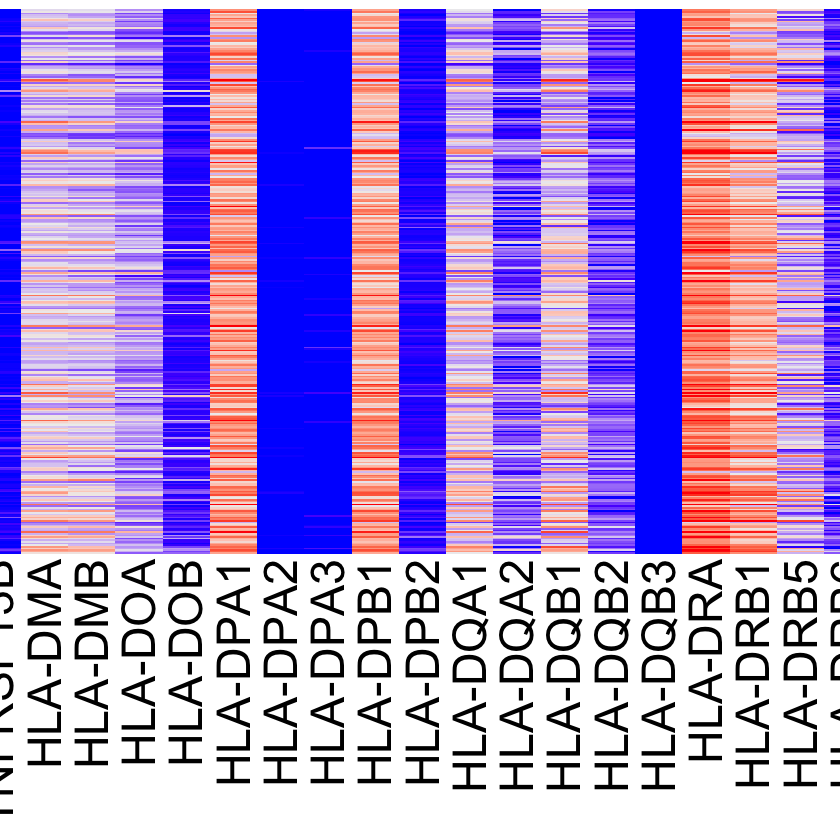

In [222]:
ht_gini + geneset

In [236]:
pdf(file = paste0(plotpath,"heatmap_TNF_C.pdf"),
        width = 100, 
        height = 80,
        useDingbats = FALSE)
    draw(ht_gini + geneset,
      ht_gap = unit(1, "cm"))
    dev.off()

pdf 
  2

## Deseq2 for NBL

In [94]:
nbl_gini <- clusteredsamples_gini_m[clusteredsamples_gini_m$cohort == "NBL",]

In [95]:
load(file = paste0(datapath, "exp_mat/TARGET_count_matrix_primary_dedup.RData"))

In [96]:
NBL_manifest <- read.table(paste0(manifestpath, "TARGET_NBL_Discovery_ClinicalData_20170525.txt"),
                          sep = "\t", na.strings = "", header = T, stringsAsFactors = F)

In [97]:
colnames(NBL_manifest)[colnames(NBL_manifest) == "TARGET.USI"] <- "case_id"

In [98]:
NBL_manifest_subset <- NBL_manifest[NBL_manifest$case_id %in% nbl_gini$case_id,]

In [99]:
nbl_gini <- merge(nbl_gini, NBL_manifest_subset[, c("case_id", "MYCN.status", "COG.Risk.Group")], by = "case_id")

In [100]:
dim(nbl_gini)

[1] 89 38

In [101]:
nbl_gini$subgroup <- NA
nbl_gini$subgroup[nbl_gini$gini > 0.2951] <- "High_gini"
nbl_gini$subgroup[nbl_gini$gini <= 0.2951] <- "Low_gini"

In [102]:
counts <- TARGET_count_matrix_primary_dedup
rownames(counts) <- counts$gene_symbol
counts$gene_symbol <- NULL
counts$ensembl <- NULL
counts <- counts[, colnames(counts) %in% nbl_gini$sample_id]
counts <- as.matrix(counts)
mode(counts) <- "integer"

In [103]:
dds <- DESeqDataSetFromMatrix(counts, colData = nbl_gini, 
                              design = ~subgroup + MYCN.status + COG.Risk.Group + ImmuneScore)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]


In [104]:
dds$subgroup <- relevel(dds$subgroup, ref = "Low_gini")

In [105]:
table(dds$subgroup)


 Low_gini High_gini 
       31        58 

In [106]:
keep <- rowSums(counts(dds)) >= 10
dds <- dds[keep,]

In [107]:
head(rownames(dds))

[1] "TSPAN6"   "TNMD"     "DPM1"     "SCYL3"    "C1orf112" "FGR"

In [108]:
gtf <- read.table(file.path(datapath, "DEG/geneID_ensembl"), sep = "t",header = F, stringsAsFactors = F)
gtf$V2 <- trimws(gtf$V2)

In [109]:
dds <- dds[rownames(dds) %in% gtf$V2,]

In [110]:
dds <- DESeq(dds, parallel = TRUE)
res <- results(dds)

estimating size factors
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
estimating dispersions
gene-wise dispersion estimates: 2 workers
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warnin

In [111]:
resultsNames(dds)

[1] "Intercept"                                    
[2] "subgroup_High_gini_vs_Low_gini"               
[3] "MYCN.status_Not.Amplified_vs_Amplified"       
[4] "MYCN.status_Unknown_vs_Amplified"             
[5] "COG.Risk.Group_Intermediate.Risk_vs_High.Risk"
[6] "COG.Risk.Group_Low.Risk_vs_High.Risk"         
[7] "ImmuneScore"

In [112]:
myres <- results(dds, name = "subgroup_High_gini_vs_Low_gini")

In [114]:
myres$threshold <- NA
myres$threshold[ myres$log2FoldChange > 3 & myres$padj < 0.05] <- "Up"
myres$threshold[ myres$log2FoldChange < -3 & myres$padj < 0.05] <- "Down"
myres$threshold[ is.na(myres$threshold)] <- "none"

In [115]:
myres <- as.data.frame(myres)

In [116]:
table(myres$threshold)


 Down  none    Up 
   29 18267    15 

In [118]:
myres[ myres$threshold == "Up",]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,threshold
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
SMPX,23.022779,3.068174,0.7165664,4.281772,0.000018541078077,0.003058609736,Up
GPR50,10.489860,3.093950,0.8751016,3.535532,0.000406954335279,0.031845046296,Up
PPY,13.325200,3.011988,0.6205433,4.853792,0.000001211228709,0.000326158954,Up
MYOG,21.181119,3.867378,0.7359444,5.254987,0.000000148035262,0.000056472368,Up
SCGB1D2,10.520305,4.470975,0.9243916,4.836667,0.000001320340475,0.000350387745,Up
SNTG1,23.658466,3.131958,0.7635093,4.102056,0.000040949524760,0.006046989902,Up
MAGEA8,184.102761,3.294909,0.6365742,5.176002,0.000000226690676,0.000083018659,Up
PASD1,8.820620,3.049099,0.8534827,3.572538,0.000353537742381,0.028771687114,Up
LMOD2,42.553297,3.900373,0.6741842,5.785323,0.000000007237314,0.000004274918,Up


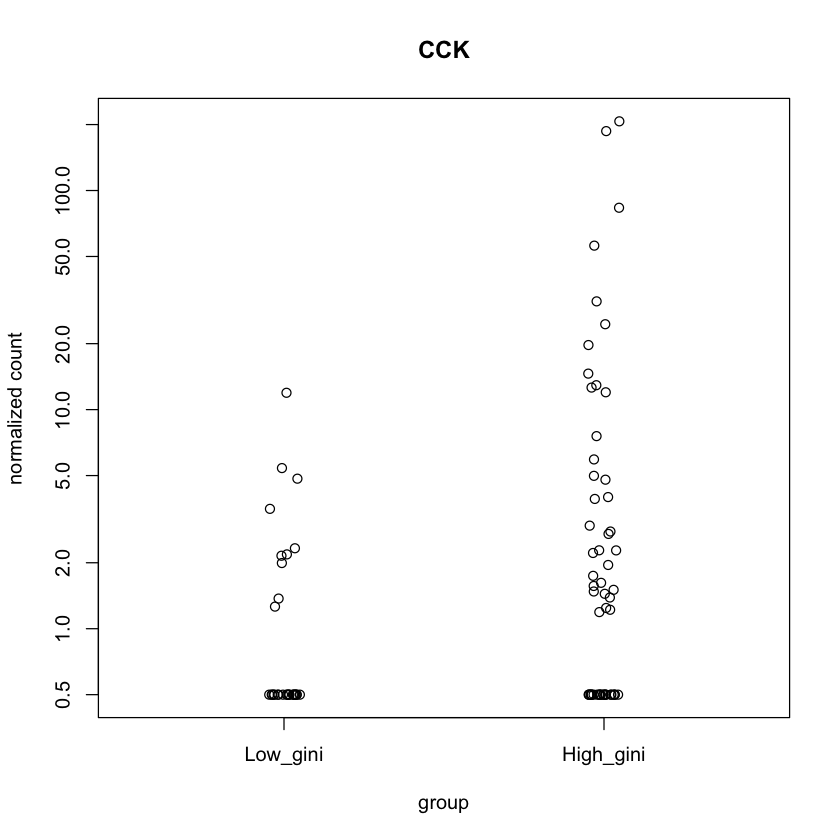

In [134]:
plotCounts(dds, gene = "CCK", intgroup = "subgroup")

In [119]:
resLFC <- lfcShrink(dds, coef="subgroup_High_gini_vs_Low_gini", type="apeglm")

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895


In [120]:
resLFC$threshold <- NA
resLFC$threshold[ resLFC$log2FoldChange > 3 & resLFC$padj < 0.05] <- "Up"
resLFC$threshold[ resLFC$log2FoldChange < -3 & resLFC$padj < 0.05] <- "Down"
resLFC$threshold[ is.na(resLFC$threshold)] <- "none"

In [121]:
resLFC <- as.data.frame(resLFC)

In [122]:
table(resLFC$threshold)


 Down  none    Up 
    7 18299     5 

In [123]:
resLFC[ resLFC$threshold == "Down",]

,baseMean,log2FoldChange,lfcSE,pvalue,padj,threshold
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
HSD17B2,81.82387,-3.914060,0.6550863,0.000000000048731580967435,0.00000004957355439415,Down
SLC10A1,42.91864,-3.789973,0.5150361,0.000000000000000036143845,0.00000000000022060998,Down
C4BPB,59.99565,-3.586994,0.5589226,0.000000000003043482273796,0.00000000506629126504,Down
MT1G,213.57945,-3.242613,0.5695852,0.000000000171065746681870,0.00000015661924437459,Down
ACOT12,41.85586,-3.680342,0.5569259,0.000000000000068173374316,0.00000000015604033214,Down
ADH6,60.65408,-4.129597,0.5568584,0.000000000000000008366914,0.00000000000007660328,Down
DIO1,35.20495,-3.505559,0.5203003,0.000000000000004796362551,0.00000000001463769911,Down


In [124]:
topdegs <- ggplot(as.data.frame(resLFC), aes(x=log2FoldChange, y=-log10(pvalue))) +
geom_point(aes(color = threshold), size=2.5) +
scale_colour_manual(values = c("Down"= "blue", "Up"="red",  "none"= "black")) +
xlab("log2 fold change") + ylab("-log10 p-value") + myplot 

In [125]:
ranks_nbl <- res$log2FoldChange
names(ranks_nbl) <- rownames(res)
ranks_nbl <- ranks_nbl[!is.na(ranks_nbl)]
head(ranks_nbl)

TSPAN6           TNMD           DPM1          SCYL3       C1orf112 
 0.00007964197  0.00054624195 -0.00011983894  0.00002592693 -0.00008083020 
           FGR 
-0.00031822089

In [126]:
Hs.H <- read.table(paste0(datapath, "DEG/h.all.v7.1.symbols.gmt"), 
                   header = F, check.names = F, sep = "\t", fill = T,
                  stringsAsFactors = F)

In [127]:
rownames(Hs.H) <- Hs.H$V1
Hs.H$V1 <- NULL
Hs.H$V2 <- NULL

In [128]:
Hs.H.list <- as.list(as.data.frame(t(Hs.H)))

In [129]:
library(fgsea)

Loading required package: Rcpp


In [130]:
fgseaRes_nbl <- fgsea(Hs.H.list, ranks_nbl, minSize=10, maxSize = 500, nperm=1000)

Warning message in fgsea(Hs.H.list, ranks_nbl, minSize = 10, maxSize = 500, nperm = 1000):
“There are ties in the preranked stats (0.03% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”

In [131]:
gsea_nbl <- ggplot(fgseaRes_nbl, aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill=padj<0.05)) +
  coord_flip() +
labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + myplot #+ myaxis

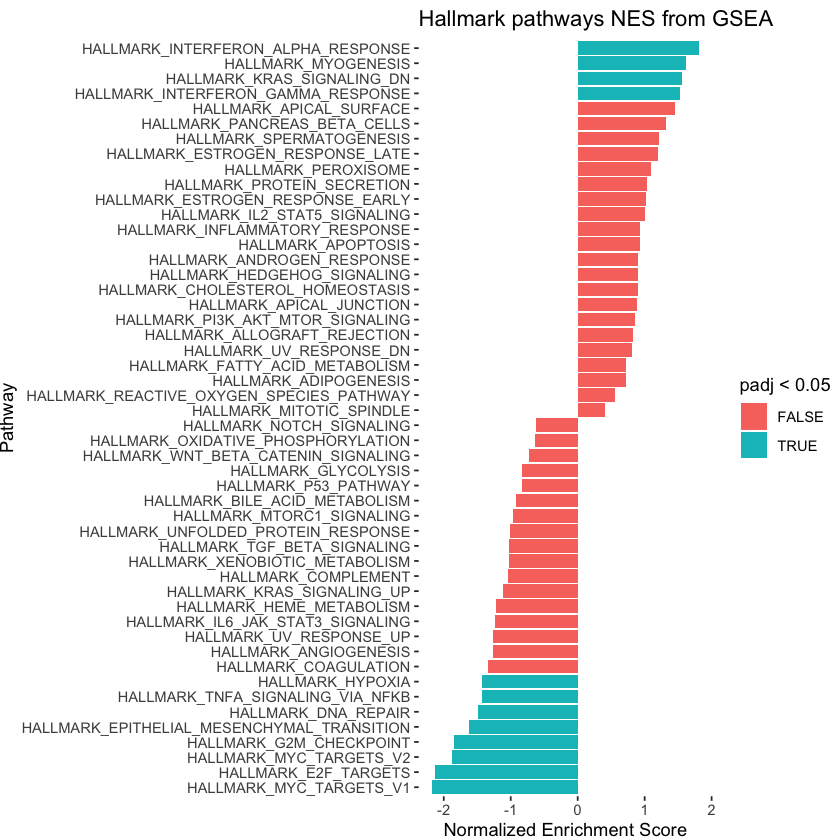

In [132]:
gsea_nbl

In [2697]:
alphaplot <- plotEnrichment(Hs.H.list[["HALLMARK_INTERFERON_ALPHA_RESPONSE"]], ranks_nbl) + labs(title = "HALLMARK_INTERFERON_ALPHA_RESPONSE")
gammaplot <- plotEnrichment(Hs.H.list[["HALLMARK_INTERFERON_GAMMA_RESPONSE"]], ranks_nbl) + labs(title = "HALLMARK_INTERFERON_GAMMA_RESPONSE")

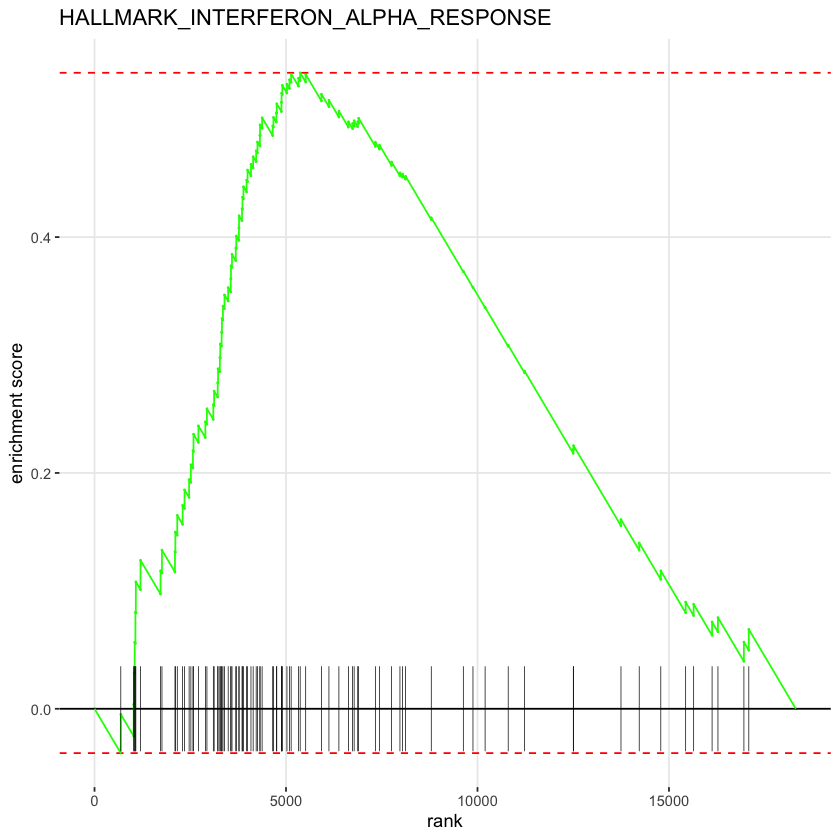

In [2698]:
alphaplot

In [2701]:
pdf(file = paste0(plotpath,"nbl_IFNalpha_gsea.pdf"),
    width = 10, 
    height = 5,
    useDingbats = FALSE,
    onefile = FALSE)
alphaplot
dev.off()

pdf 
  2

In [2702]:
pdf(file = paste0(plotpath,"nbl_IFNgamma_gsea.pdf"),
    width = 10, 
    height = 5,
    useDingbats = FALSE,
    onefile = FALSE)
gammaplot
dev.off()

pdf 
  2

# Table S6

In [14]:
colnames(clusteredsamples_gini_m)

[1] "sample_id"        "aliquot_id"       "StromalScore"     "ImmuneScore"     
 [5] "ESTIMATEScore"    "name"             "case_id"          "gender"          
 [9] "ethnicity"        "race"             "age_at_diagnosis" "vital_status"    
[13] "days_to_death"    "days_to_progress" "recurrence"       "disease_type"    
[17] "primary_site"     "group"            "cohort"           "sample_type"     
[21] "age_class"        "B.cells"          "Macrophages.M1"   "Macrophages.M2"  
[25] "Monocytes"        "Neutrophils"      "NK.cells"         "T.cells.CD4"     
[29] "T.cells.CD8"      "Tregs"            "Dendritic.cells"  "Other"           
[33] "unique_cdr3"      "gini"             "octamers"

In [20]:
cols <- c("sample_id", "case_id", "cohort", "group", "unique_cdr3", "octamers","gini")

In [21]:
tables6 <- clusteredsamples_gini_m[,cols]

In [22]:
tables6$sample_id <- gsub("7316", "X7316", tables6$sample_id)

In [23]:
write.csv(tables6,
          file = paste0(datapath, "TableS6.csv"),row.names = FALSE)

# Deprecated

In [ ]:
circlepack.fx <- function(inputfile, sample_id){
#inputfile is: all_clustered_IGH_12rm
    sample_df <- inputfile[inputfile$sample_id == sample_id,]
    octamer_tab <- as.data.frame(table(sample_df$octamer), stringsAsFactors = F)
# Should have only octamers > 3 sequences
    octamer_tab <- octamer_tab[octamer_tab$Freq > 2,]
    
# Make edge df
    myedge <- cbind.data.frame(NA,octamer_tab$Var1, stringsAsFactors = F)
    colnames(myedge) <- c("from", "to")
    myedge$from <- unique(sample_df$sample_id)
    octamer_cdr3 <- sample_df[, c("octamer", "nSeqCDR3")]
    colnames(octamer_cdr3) <- c("from", "to")
# make a list of octamer-cdr3s and replace octamers < 3 sequences with sample_id
    octamer_cdr3$from[!octamer_cdr3$from %in% octamer_tab$Var1] <- unique(sample_df$sample_id)
    myedge <- rbind(myedge, octamer_cdr3)
    
#vertix df    
    myvertex <- cbind.data.frame(NA,NA ,stringsAsFactors = F)
    colnames(myvertex) <- c("Var1", "Freq")
# get cdr3 frequencies    
    cdr3_freq <- as.data.frame(table(sample_df$nSeqCDR3), stringsAsFactors = F)
    colnames(cdr3_freq) <- c("name", "size")
# get sample frequency    
    sample_tab <- as.data.frame(table(sample_df$sample_id), stringsAsFactors = F)
#bind all and cleanup
    myvertex <- rbind(myvertex, octamer_tab, sample_tab)
# first row is NA so remove it
    myvertex <- myvertex[!is.na(myvertex$Var1),]
    myvertex$Freq <- as.numeric(myvertex$Freq)
    colnames(myvertex) <- c("name", "size")
    myvertex <- rbind(myvertex, cdr3_freq)
    
# Make a type variable for colors
    myvertex$type <- NA
    myvertex$type[myvertex$name %in% octamer_tab$Var1] <- "octamer"
    myvertex$type[myvertex$name %in% cdr3_freq$name] <- "CDR3"
    
#Make graph and plot    
    mygraph <- graph_from_data_frame(myedge, vertices = myvertex)  
    colpal <- c("CDR3" = "light grey","octamer" = "blue")
    alphapal <- c("CDR3" = 1,"octamer" = 0.5)
    circlep <- ggraph(mygraph, layout = 'circlepack', weight = size) + 
    geom_node_circle(aes(fill = type, alpha = type)) +
    theme_void() + scale_fill_manual(values = colpal ,na.value="transparent") +
    scale_alpha_manual(values = alphapal)
    
    pdf(file = paste0(plotpath,sample_id,"IGH_circles.pdf"),
        width = 15, 
        height = 15,
        useDingbats = FALSE)
    print(circlep)
    dev.off()
}